In [112]:
import lightgbm as lgb
from sklearn import metrics
import category_encoders as ce

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb

In [113]:
df = pd.read_csv('../data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio'] = df['fecha'].dt.year
df["mes"] = df['fecha'].dt.month
df["dia"] = df['fecha'].dt.day

df = df.drop(columns=["lat","lng","direccion","id","fecha","descripcion","titulo"])

In [114]:
df1 = df.dropna(subset=df.columns)

In [115]:
def predecir(model, train_features, train_labels, test_features, test_labels):
    predict = model.score(test_features,test_labels)
    print('Entrenamiento: {:0.4f}%'.format(model.score(train_features, train_labels)*100))
    print('Testeo: {:0.4f}%.'.format(predict*100))
    
    return predict

In [116]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['ciudad', 'provincia', 'tipodepropiedad']
data_cols = df1._get_numeric_data().columns

baseline_data = df1[data_cols]

encoder = LabelEncoder()
encoded = df1[cat_features].apply(encoder.fit_transform)

data = baseline_data.join(encoded)

x = data[data.columns.drop("precio")]
y = data['precio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.60)

In [117]:
def knn_predictor(distancia,x_train,y_train,x_test,y_test):
    kesimos = []
    result = []
    for i in range(0,15):
        k=5+i
        kesimos.append(k)
        knn = KNeighborsRegressor(n_neighbors = k, metric=distancia)
        knn.fit(x_train, y_train)
        res = predecir(knn,x_train,y_train,x_test,y_test)
        result.append(res)
    return result, kesimos

In [118]:
def knn_best_distance(df,dist,x_train,y_train,x_test,y_test):
    for x in dist:
        print(x+" --------------------------")
        result , k = knn_predictor(x,x_train,y_train,x_test,y_test)
        df[x] = result
        

In [119]:
dists = ["euclidean",
"manhattan",
"chebyshev"]

In [120]:
k = list(range(5,20))
prueba = pd.DataFrame(k,index=k,columns=["Kactual"])

In [121]:
x_train.isnull().any()

antiguedad                    False
habitaciones                  False
garages                       False
banos                         False
metroscubiertos               False
metrostotales                 False
idzona                        False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
anio                          False
mes                           False
dia                           False
ciudad                        False
provincia                     False
tipodepropiedad               False
dtype: bool

In [122]:
knn_best_distance(prueba,dists,x_train,y_train,x_test,y_test)


euclidean --------------------------
Entrenamiento: 82.1893%
Testeo: 71.5744%.
Entrenamiento: 80.9067%
Testeo: 71.9596%.
Entrenamiento: 80.0649%
Testeo: 72.0745%.
Entrenamiento: 79.3474%
Testeo: 72.2314%.
Entrenamiento: 78.8357%
Testeo: 72.2709%.
Entrenamiento: 78.2755%
Testeo: 72.2166%.
Entrenamiento: 77.8701%
Testeo: 72.1650%.
Entrenamiento: 77.4534%
Testeo: 72.1278%.
Entrenamiento: 77.1295%
Testeo: 72.1432%.
Entrenamiento: 76.7582%
Testeo: 72.1340%.
Entrenamiento: 76.4292%
Testeo: 72.1244%.
Entrenamiento: 76.1890%
Testeo: 72.0398%.
Entrenamiento: 75.9836%
Testeo: 71.9448%.
Entrenamiento: 75.7265%
Testeo: 71.8650%.
Entrenamiento: 75.4969%
Testeo: 71.7851%.
manhattan --------------------------
Entrenamiento: 83.2317%
Testeo: 73.2529%.
Entrenamiento: 82.1756%
Testeo: 73.6369%.
Entrenamiento: 81.2388%
Testeo: 73.8083%.
Entrenamiento: 80.5398%
Testeo: 73.9106%.
Entrenamiento: 79.9456%
Testeo: 73.8949%.
Entrenamiento: 79.4570%
Testeo: 73.9557%.
Entrenamiento: 79.0192%
Testeo: 73.8773%.
En

In [123]:
prueba.drop(columns="Kactual",inplace=True)

(15, -0.1)

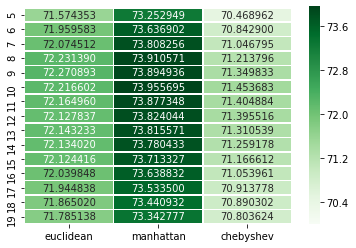

In [125]:
a= prueba.transform(lambda x: x*100)
sns.heatmap(a, annot=True, fmt='.6f', linewidths=.5,cmap="Greens", vmin=70).set_ylim(15,-0.1)